# Donut Chart for visualizing the quantities sold across Payment Modes 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
customer=pd.read_csv("customer.csv")
sales=pd.read_csv("sales.csv")
products=pd.read_csv("products.csv")
df2=sales.merge(products, on='product_id', how='left')
df=df2.merge(customer, on='customer_id', how='left')

In [2]:
df.head()

,serial_number,order_id,order_date,delivery_date,time_of_order,time_of_delivery,delivery_mode,sales_agent,payment_mode,delivery_rating,...,customer_age,Customer_type,country,city,state,SMS_Marketing,Email_Marketing,Membership_type,Joining_date,App_Downloaded
0,4720,D-94655-11910,03-01-2019,07-01-2019,10:50 AM,5:12 PM,Standard Class,Robert Paige,Debit Card,2,...,66,City Club,United States,Arlington,Virginia,NO,YES,Silver,20-02-2020,NO
1,428,D-75151-11913,04-01-2019,08-01-2019,1:27 PM,3:52 PM,Standard Class,Chris Jr,Debit Card,1,...,53,State Club,United States,Huntsville,Texas,NO,NO,Silver,04-11-2019,NO
2,429,C-55852-11913,04-01-2019,08-01-2019,1:12 PM,5:23 PM,Standard Class,Tom Renner,Credit card,1,...,70,City Club,United States,Newark,Ohio,NO,YES,Gold,17-06-2019,YES
3,1041,D-13194-11912,05-01-2019,12-01-2019,12:17 PM,10:11 AM,Standard Class,Robert Hemsworth,Debit Card,2,...,53,State Club,United States,Huntsville,Texas,NO,NO,Silver,04-11-2019,NO
4,4229,C-26707-11916,06-01-2019,07-01-2019,4:36 PM,1:41 PM,First Class,John Wick,Cash,2,...,48,State Club,United States,Saint Paul,Minnesota,YES,NO,Basic,01-02-2020,YES


In [3]:
temp_df=df[['payment_mode','quantity']]
temp_df

,payment_mode,quantity
0,Debit Card,3
1,Debit Card,6
2,Credit card,9
3,Debit Card,1
4,Cash,6
...,...,...
5903,Credit card,3
5904,Bank Transfer,2
5905,Cash,3
5906,Bank Transfer,1


In [4]:
dn_df=temp_df.groupby('payment_mode').agg({'quantity':'sum'}).reset_index()
dn_df

,payment_mode,quantity
0,Bank Transfer,5699
1,Cash,5649
2,Credit card,5570
3,Debit Card,5666


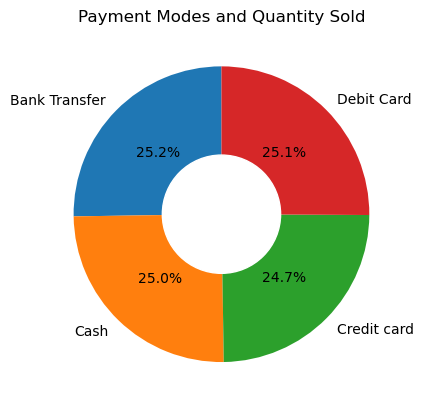

In [9]:
fig, ax = plt.subplots()
labels = dn_df['payment_mode']
sizes = dn_df['quantity']
ax.pie(sizes, 
       labels=labels, 
       autopct='%1.1f%%', 
       startangle=90, 
       counterclock=True, 
       wedgeprops={'width': 0.7}
      )
circle = plt.Circle((0, 0), 0.4, color='white')
ax.add_artist(circle)
plt.title('Payment Modes and Quantity Sold')
plt.show()